In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# imports the data
df = pd.read_csv('train.csv')

# How many values of PoolArea aren't 0?
df[df['PoolArea'] != 0]['PoolArea']

# Make PoolArea a dummy, make PoolQC a categorical
df['PoolArea'] = df['PoolArea'].clip(upper = 1)

# lists the columns that we will have their NaNs recoded to "None"
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu', 
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical', 
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st', 
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2', 
               'MSZoning', 'Utilities','LotFrontage','MasVnrArea'] 

# Recodes the NaNs into "None"
for col in cols_fillna: 
    df[col].fillna('None',inplace=True) 
    df[col].fillna('None',inplace=True)

# drops these columns
df = df.drop(['LotFrontage','MiscVal', 'Condition2', 
              'Exterior2nd','BsmtFinType2','MoSold',
              'YrSold','SaleType','SaleCondition', 'MiscFeature', 'MasVnrArea', 'GarageYrBlt'], axis=1)

# Recodes some of the ordinal variables into numerics for ML
di = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4} 
di2 = {'None': 0, 'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3} 
di3 = {'None': 0, 'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5} 
di4 = {'None': 0,'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4} 
df = df.replace({'ExterQual': di, 'ExterCond': di, 'BsmtQual': di4, 'BsmtCond': di4, 'BsmtExposure': di2, 
                'BsmtFinType1': di3, 'HeatingQC': di}) 

# Same as above for the rest of the ordinal variables
dict_howard_KitchenQual = {'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4} 
df = df.replace({'KitchenQual':dict_howard_KitchenQual})  
dict_howard_Functional = {'Sev': 1, 'Maj2': 2, 'Mod':3, 'Min2':4, 'Maj1':5, 'Min1':6, 'Typ':7} 
df = df.replace({'Functional':dict_howard_Functional})  
dict_howard_FireplaceQu = {'None': 1, 'Po': 2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6} 
df = df.replace({'FireplaceQu':dict_howard_FireplaceQu})  
dict_howard_GarageFinish = {'None': 1, 'Unf': 2, 'RFn':3, 'Fin':4} 
df = df.replace({'GarageFinish':dict_howard_GarageFinish})  
dict_howard_GarageQual = {'None': 1, 'Po': 2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex': 6} 
df = df.replace({'GarageQual':dict_howard_GarageQual})  
dict_howard_GarageCond = {'None': 1, 'Po': 2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex': 6} 
df = df.replace({'GarageCond':dict_howard_GarageCond})  
dict_howard_PoolQC = {'None': 1, 'Fa': 2, 'Gd':3, 'Ex':4} 
df = df.replace({'PoolQC':dict_howard_PoolQC}) 

# Recodes the fence variable that we missed earlier
di5 = {'None': 0, 'MnWw': 1, 'GdWo': 1, 'MnPrv': 1, 'GdPrv': 1}
df = df.replace({'Fence': di5})

# Creates dummies from the categorical variables, then replaces those categorical variables with the dummies
drop_columns=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour', 
                                       'Utilities','LotConfig','LandSlope','Neighborhood','Condition1', 
                                       'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','MasVnrType', 
                                       'Foundation','Heating','CentralAir','Electrical','GarageType','PavedDrive']
df = pd.get_dummies(df, prefix_sep="__", 
                              columns= drop_columns) 

# Makes sure things worked properly
print(df.shape)
df.isnull().any().any()

(1460, 199)


False

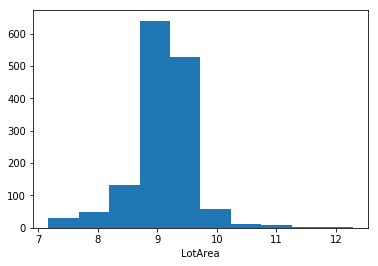

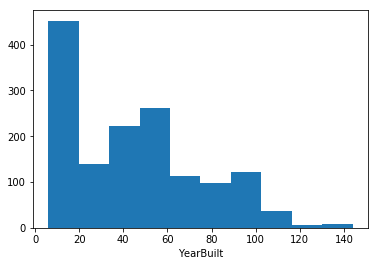

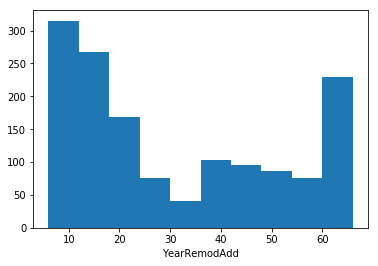

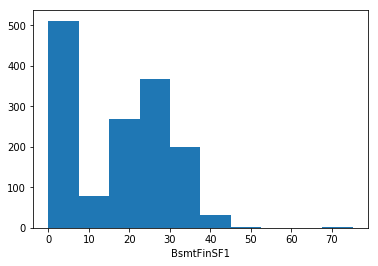

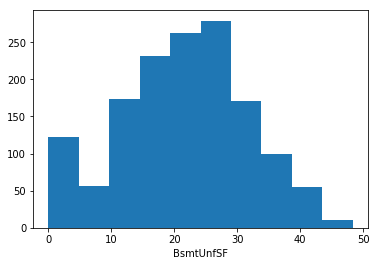

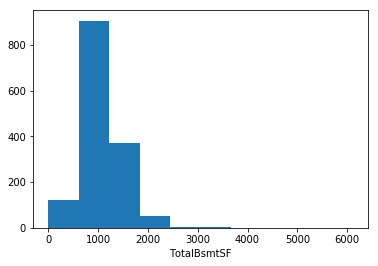

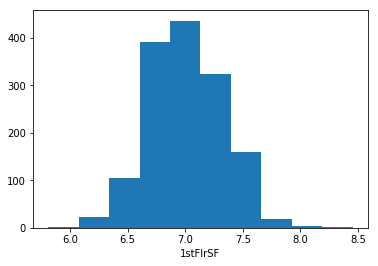

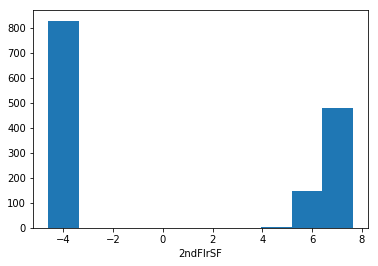

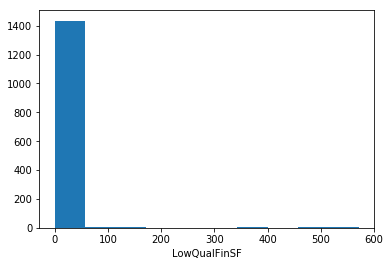

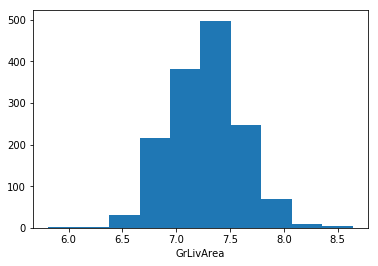

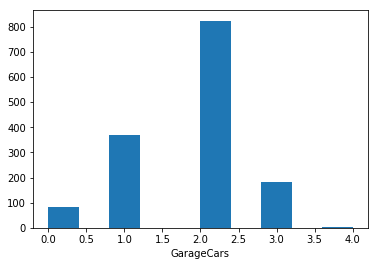

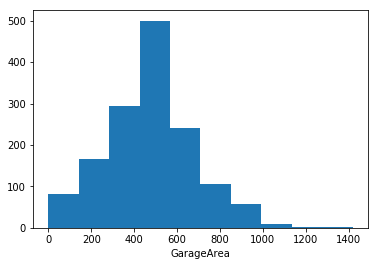

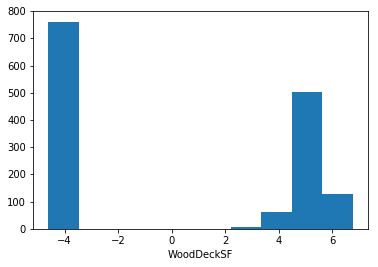

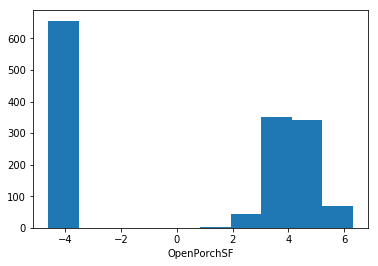

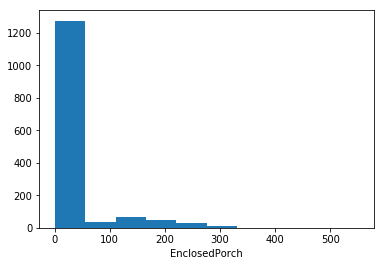

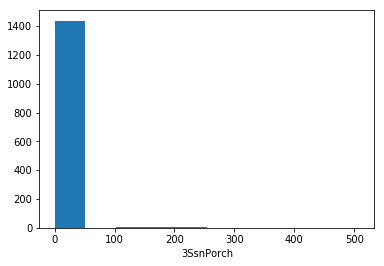

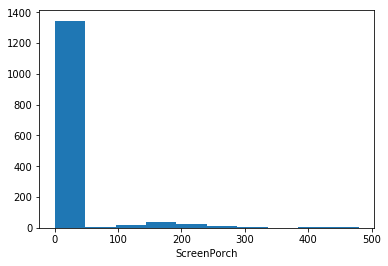

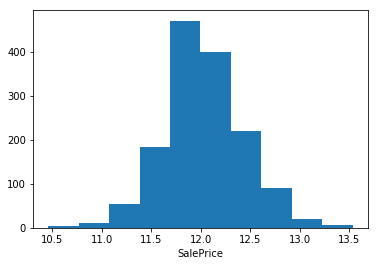

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Makes a copy of the data so we can transform variables
df_transform = df.copy()

# Adjusts the year variables
df_transform['YearBuilt'] = 2016 - df_transform['YearBuilt']
df_transform['YearRemodAdd'] = 2016 - df_transform['YearRemodAdd']

# Numeric columns that will be made into histograms
numeric_columns = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea',
                  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice']

# Columns to be logged
log_columns = ['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 
               'SalePrice']

# Columns to be square rooted
sqrt_columns = ['BsmtFinSF1', 'BsmtUnfSF']

for i in sqrt_columns:
    df_transform[i] = df_transform[i]**(1/2)

for i in log_columns:
    df_transform[i] = df_transform[i] + 0.01
    df_transform[i] = np.log(df_transform[i])

for i in numeric_columns:
    plt.hist(df_transform[i])
    plt.xlabel(i)
    plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splits the data between X and y
X = df.loc[:, df.columns != 'SalePrice'].values
y = df['SalePrice'].values

# Splits data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Builds basic, unregularized regression estimator
lr = LinearRegression(fit_intercept = False)
lr.fit(X_train, y_train)

# Calculates RMSE
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = mse**(1/2)
print(rmse) # RMSE for unregularized linear regression: 28739.74

28739.73573133797


In [5]:
X2 = df_transform.loc[:, df_transform.columns != 'SalePrice'].values
y2 = df_transform['SalePrice'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

lr.fit(X_train2, y_train2)

pred = lr.predict(X_test2)
y_test2 = np.exp(y_test2)
newpred = np.exp(pred)
mse = mean_squared_error(y_test2, newpred)
rmse = mse**(1/2)
print(rmse) # RMSE for transformed, unregularized linear regression: 23111.92

23111.91917245426


In [6]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Sets a parameter range for the gridsearch
lasso = Lasso()
param_range = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 0.1, 1, 5, 10, 20, 100, 1000]}

# Sets the gridsearch parameter
lasso_grid = GridSearchCV(lasso, param_range, scoring = 'neg_mean_squared_error', cv = 5)

# Performs the gridsearch, prints the best parameter
lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)
print((-1*lasso_grid.best_score_)**(1/2))

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

{'alpha': 100}
37337.122116503575


C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [7]:
# Creates a lasso estimator using the best parameter
lasso = Lasso(alpha = 100)


# Builds the regression and calculates RMSE
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = mse**(1/2)
print(rmse) # RMSE for untransformed lasso: 28706.59

# Don't worry about this
#df_transform.loc[:, df_transform.columns != 'SalePrice'].columns
#lasso.coef_
#df.loc[:, df.columns != 'SalePrice'].columns[lasso.coef_!=0]

28706.592421313366


In [8]:
lasso = Lasso()
param_range = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 0.1, 1, 5, 10, 20, 100, 1000]}

lasso_grid = GridSearchCV(lasso, param_range, scoring = 'neg_mean_squared_error', cv = 5)

# Performs the gridsearch for the transformed data
lasso_grid.fit(X_train2, y_train2)
print(lasso_grid.best_params_)
print((-1*lasso_grid.best_score_)**(1/2))

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

{'alpha': 0.0001}
0.14568587823832296


In [9]:
lasso = Lasso(alpha = 0.0001)

# Builds the lasso regression for the transformed data
lasso.fit(X_train2, y_train2)
pred = lasso.predict(X_test2)
newpred = np.exp(pred)
mse = mean_squared_error(y_test2, newpred)
rmse = mse**(1/2)
print(rmse) # RMSE for transformed lasso: 22731.00

# ignore this stuff
#lasso.coef_[20]
#df.columns[20]

22731.00284735252


In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge()
param_range = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 0.1, 1, 5, 10, 20, 100, 1000]}

ridge_grid = GridSearchCV(ridge, param_range, scoring = 'neg_mean_squared_error', cv = 5)

ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)
print((-1*ridge_grid.best_score_)**(1/2))

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.29807e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.87273e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.28993e-20): result may not be accurate.
  overwrite_a=True).T


{'alpha': 0.1}
38236.478818868745


C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
ridge = Ridge(alpha = 100)


# Builds the regression and calculates RMSE
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = mse**(1/2)
print(rmse) # RMSE for untransformed ridge regression: 31575.69

31575.69080560669


In [12]:
ridge = Ridge()
param_range = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 0.1, 1, 5, 10, 20, 100, 1000]}

ridge_grid = GridSearchCV(ridge, param_range, scoring = 'neg_mean_squared_error', cv = 5)

# Performs the gridsearch for the transformed data
ridge_grid.fit(X_train2, y_train2)
print(ridge_grid.best_params_)
print((-1*ridge_grid.best_score_)**(1/2))

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.26611e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.38454e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.16845e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.85166e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.62534e-

{'alpha': 5}
0.14825299181314053


C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
ridge = Ridge(alpha = 5)

# Builds the lasso regression for the transformed data
ridge.fit(X_train2, y_train2)
pred = ridge.predict(X_test2)
newpred = np.exp(pred)
mse = mean_squared_error(y_test2, newpred)
rmse = mse**(1/2)
print(rmse) # RMSE for transformed ridge regression: 25517.09

25517.088622181087


In [14]:
df_transform2 = df.copy()

df_transform['YearBuilt'] = 2016 - df_transform['YearBuilt']
df_transform['YearRemodAdd'] = 2016 - df_transform['YearRemodAdd']

# Numeric columns that will be made into histograms
numeric_columns = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea',
                  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

# Columns to be logged
log_columns = ['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']

# Columns to be square rooted
sqrt_columns = ['BsmtFinSF1', 'BsmtUnfSF']

for i in sqrt_columns:
    df_transform2[i] = df_transform2[i]**(1/2)

for i in log_columns:
    df_transform2[i] = df_transform2[i] + 0.01
    df_transform2[i] = np.log(df_transform2[i])
    
X3 = df_transform2.loc[:, df_transform2.columns != 'SalePrice'].values
y3 = df_transform2['SalePrice'].values

# Splits data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [15]:
lasso = Lasso()
param_range = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 0.1, 1, 5, 10, 20, 100, 1000]}

lasso_grid = GridSearchCV(lasso, param_range, scoring = 'neg_mean_squared_error', cv = 5)

# Performs the gridsearch for the transformed data
lasso_grid.fit(X_train3, y_train3)
print(lasso_grid.best_params_)
print((-1*lasso_grid.best_score_)**(1/2))

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

{'alpha': 100}
37300.460645295556


C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
lasso = Lasso(alpha = 100)

# Builds the lasso regression for the transformed data
lasso.fit(X_train3, y_train3)
pred = lasso.predict(X_test3)
mse = mean_squared_error(y_test3, pred)
rmse = mse**(1/2)
print(rmse) # RMSE for transformed x untransformed y lasso: 30167.50

30167.501047138983


In [17]:
df_transform4 = df.copy()

df_transform4['SalePrice'] = np.log(df_transform4['SalePrice'])

X4 = df_transform4.loc[:, df_transform4.columns != 'SalePrice'].values
y4 = df_transform4['SalePrice'].values

# Splits data into training and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=42)

In [18]:
lasso = Lasso()
param_range = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 0.1, 1, 5, 10, 20, 100, 1000]}

lasso_grid = GridSearchCV(lasso, param_range, scoring = 'neg_mean_squared_error', cv = 5)

# Performs the gridsearch for the transformed data
lasso_grid.fit(X_train4, y_train4)
print(lasso_grid.best_params_)
print((-1*lasso_grid.best_score_)**(1/2))

C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\jfaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

{'alpha': 0.0001}
0.15978438266169223


In [58]:
print(lasso.coef_[110])

0.1648443860844896


In [59]:
print(df_transform4.columns[110])

Neighborhood__Somerst


In [121]:
lr = LinearRegression(fit_intercept = False)

# Builds the linear regression for the transformed data
lr.fit(X_train4, y_train4)
pred = lr.predict(X_test4)
newpred = np.exp(pred)
y_test4 = np.exp(y_test4)
mse = mean_squared_error(y_test4, newpred)
rmse = mse**(1/2)
print(rmse) # RMSE for untransformed x transformed y unregularized regression: 22687.35

22687.351650543973


In [122]:
ridge = Ridge()
param_range = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-2, 0.1, 1, 5, 10, 20, 100, 1000]}

ridge_grid = GridSearchCV(ridge, param_range, scoring = 'neg_mean_squared_error', cv = 5)

ridge_grid.fit(X_train4, y_train4)
print(ridge_grid.best_params_)
print((-1*ridge_grid.best_score_)**(1/2))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.930285e-22
  overwrite_a=True).T
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.890859e-20
  overwrite_a=True).T
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.917621e-20
  overwrite_a=True).T


{'alpha': 10}
0.1595012486780567


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [125]:
ridge = Ridge(alpha = 10)

# Builds the linear regression for the transformed data
ridge.fit(X_train4, y_train4)
pred = ridge.predict(X_test4)
newpred = np.exp(pred)
y_test4 = np.exp(y_test4)
mse = mean_squared_error(y_test4, newpred)
rmse = mse**(1/2)
print(rmse) # RMSE for untransformed x, transformed y ridge regression: 25171.24

25171.240013631974
